# Introduction to Julia

<img src="./julia_logo.png" align="center" width="400"/>

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Current stable release v1.1.0

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## Gibbs sampler example by Doug Bates

* An example from Dr. Doug Bates's slides [Julia for R Programmers](http://www.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf).

* The task is to create a Gibbs sampler for the density  
$$
f(x, y) = k x^2 exp(- x y^2 - y^2 + 2y - 4x), x > 0
$$
using the conditional distributions
$$
\begin{eqnarray*}
  X | Y &\sim& \Gamma \left( 3, \frac{1}{y^2 + 4} \right) \\
  Y | X &\sim& N \left(\frac{1}{1+x}, \frac{1}{2(1+x)} \right).
\end{eqnarray*}
$$

* R solution. The `RCall.jl` package allows us to execute R code without leaving the `Julia` environment. We first define an R function `Rgibbs()`.

In [1]:
using RCall

R"""
library(Matrix)

Rgibbs <- function(N, thin) {
  mat <- matrix(0, nrow=N, ncol=2)
  x <- y <- 0
  for (i in 1:N) {
    for (j in 1:thin) {
      x <- rgamma(1, 3, y * y + 4) # 3rd arg is rate
      y <- rnorm(1, 1 / (x + 1), 1 / sqrt(2 * (x + 1)))
    }
    mat[i,] <- c(x, y)
  }
  mat
}
"""

RObject{ClosSxp}
function (N, thin) 
{
    mat <- matrix(0, nrow = N, ncol = 2)
    x <- y <- 0
    for (i in 1:N) {
        for (j in 1:thin) {
            x <- rgamma(1, 3, y * y + 4)
            y <- rnorm(1, 1/(x + 1), 1/sqrt(2 * (x + 1)))
        }
        mat[i, ] <- c(x, y)
    }
    mat
}


To generate a sample of size 10,000 with a thinning of 500. How long does it take?

In [2]:
R"""
system.time(Rgibbs(10000, 500))
"""

RObject{RealSxp}
   user  system elapsed 
 21.843   1.554  23.418 


* This is a Julia function for the simple Gibbs sampler:

In [3]:
using Distributions

function jgibbs(N, thin)
    mat = zeros(N, 2)
    x = y = 0.0
    for i in 1:N
        for j in 1:thin
            x = rand(Gamma(3, 1 / (y * y + 4)))
            y = rand(Normal(1 / (x + 1), 1 / sqrt(2(x + 1))))
        end
        mat[i, 1] = x
        mat[i, 2] = y
    end
    mat
end

jgibbs (generic function with 1 method)

Generate the same number of samples. How long does it take?

In [4]:
jgibbs(100, 5); # warm-up
@elapsed jgibbs(10000, 500)

0.370531903

We see 40-80 fold speed up of `Julia` over `R` on this example, **with similar coding effort**!

## Learning resources

1. The (free) online course [Introduction to Julia](https://juliaacademy.com/p/intro-to-julia), by Jane Herriman. 

2. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

3. Browse the Julia [documentation](https://docs.julialang.org/en).  

4. For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  

    For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

5. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.4) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
1. `quit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google (of course).

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit sin(π)`.

* Discourse: <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* Julia homepage lists many choices: Juno, VS Code, Vim, ...

* Unfortunately at the moment there are no mature RStudio- or Matlab-like IDE for Julia yet.

* For dynamic document, e.g., homework, I recommend [Jupyter Notebook](https://jupyter.org/install.html) or [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/). 

* For extensive Julia coding, myself has been happily using the editor [VS Code](https://code.visualstudio.com) with extensions `Julia` and `VS Code Jupyter Notebook Previewer` installed. 

## Julia package system

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.4) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.4) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.4) pkg> add https://github.com/OpenMendel/SnpArrays.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

In [5]:
;ls ~/.julia/packages

┌ Warning: Parsing command "ls ~/.julia/packages". Special characters "#{}()[]<>|&*?~;" should now be quoted in commands
│   caller = shell_parse(::String, ::Bool; special::String) at shell.jl:107
└ @ Base ./shell.jl:107


AbstractFFTs
AbstractMCMC
AbstractTrees
AccurateArithmetic
Adapt
AlgebraicMultigrid
AlgorithmsFromTheBook
ArgCheck
ArnoldiMethod
Arpack
Arpack_jll
ArrayFire
ArrayInterface
ArrayLayouts
AssetRegistry
Automa
AxisAlgorithms
AxisArrays
BEDFiles
BGZFStreams
BSON
BenchmarkTools
BinDeps
BinaryProvider
BioCore
BioSequences
BioSymbols
Blink
BlockArrays
BlockDiagonals
BufferedStreams
Bzip2_jll
CEnum
CMake
CMakeWrapper
CPLEX
CRlibm
CSSUtil
CSTParser
CSV
CUDAapi
CUDAdrv
CUDAnative
Cairo
Calculus
CatIndices
CategoricalArrays
Cbc
Clp
Clustering
CodecBzip2
CodecXz
CodecZlib
CodecZstd
Codecs
ColorTypes
ColorVectorSpace
Colors
Combinatorics
CommonSubexpressions
Compat
CompilerSupportLibraries_jll
Compose
ComputationalResources
Conda
ConicBenchmarkUtilities
Contour
Convex
CoordinateTransformations
CoupledFields
Crayons
CuArrays
CustomUnitRanges
DSP
Dagger
DataAPI
DataArrays
DataDeps
DataFrames
DataFramesMeta
DataStreams
DataStructures
DataValueInterfaces
DataValues
DecFP
DecisionTree
DeepDiffs
Dictionar

* Directory of a specific package can be queried by `pathof()`:

In [6]:
using Distributions

pathof(Distributions)

"/Users/huazhou/.julia/packages/Distributions/JvP1S/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

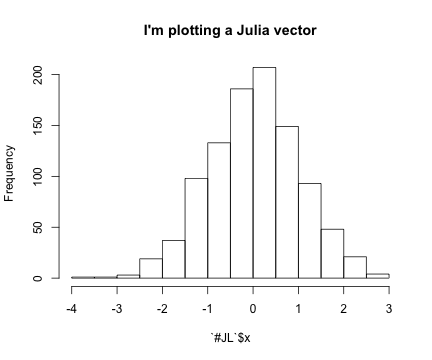

RObject{VecSxp}
$breaks
 [1] -4.0 -3.5 -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0

$counts
 [1]   1   1   3  19  37  98 133 186 207 149  93  48  21   4

$density
 [1] 0.002 0.002 0.006 0.038 0.074 0.196 0.266 0.372 0.414 0.298 0.186 0.096
[13] 0.042 0.008

$mids
 [1] -3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75
[13]  2.25  2.75

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [7]:
using RCall

x = randn(1000)
R"""
hist($x, main="I'm plotting a Julia vector")
"""

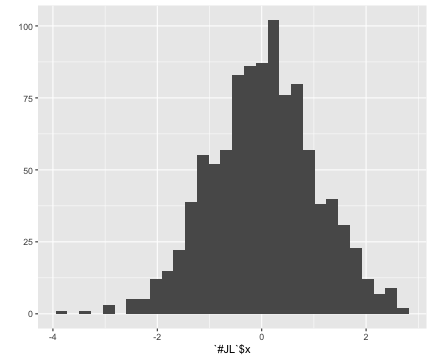

RObject{VecSxp}


┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall /Users/huazhou/.julia/packages/RCall/g7dhB/src/io.jl:113


In [8]:
R"""
library(ggplot2)
qplot($x)
"""

In [9]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1]  0.07297491 -0.26189616 -1.28250082 -0.52631360 -0.56181989  0.28672889
 [7] -0.66823162 -1.60006316  0.32863610 -1.75180721


In [10]:
# collect R variable into Julia workspace
y = collect(x)

10-element Array{Float64,1}:
  0.07297491311471144
 -0.26189616396359133
 -1.2825008244976932
 -0.5263136023269718
 -0.5618198888106269
  0.28672888666426727
 -0.6682316230841069
 -1.600063163916059
  0.3286360955437114
 -1.751807211443077

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`XRJulia`](https://cran.r-project.org/web/packages/XRJulia/) package by John Chambers.

## Some basic Julia code

In [11]:
# an integer, same as int in R
y = 1
typeof(y) 

Int64

In [12]:
# a Float64 number, same as double in R
y = 1.0
typeof(y) 

Float64

In [13]:
# Greek letters:  `\pi<tab>`
π

π = 3.1415926535897...

In [14]:
typeof(π)

Irrational{:π}

In [15]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [16]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0

5.0

In [17]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

In [18]:
# vector of Float64 0s
x = zeros(5)

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [19]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Array{Int64,1}:
 0
 0
 0
 0
 0

In [20]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [21]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [22]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [23]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [24]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Array{Float64,2}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [25]:
# rational number
a = 3//5

3//5

In [26]:
typeof(a)

Rational{Int64}

In [27]:
b = 3//7

3//7

In [28]:
a + b

36//35

In [29]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Array{Float64,2}:
 0.864184  0.667057  0.013841
 0.74435   0.168297  0.0937011
 0.680342  0.365246  0.757738
 0.743837  0.495153  0.524222
 0.637257  0.353181  0.760721

In [30]:
# uniform random numbers (in single precision)
x = rand(Float16, 5, 3)

5×3 Array{Float16,2}:
 0.6553    0.3408   0.1338
 0.001953  0.11523  0.6133
 0.3398    0.2285   0.126
 0.02051   0.5137   0.03516
 0.248     0.2969   0.0537

In [31]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Array{Int64,2}:
 5  4  2
 5  5  3
 2  2  1
 4  5  1
 4  1  4

In [32]:
# standard normal random numbers
x = randn(5, 3)

5×3 Array{Float64,2}:
 -2.76792    0.359259   0.989608
  0.689269   0.283704   0.526334
 -0.14571    1.56716   -0.32853
  0.516913   1.30389    0.829142
  0.113064  -0.202403   0.711031

In [33]:
# range
1:10

1:10

In [34]:
typeof(1:10)

UnitRange{Int64}

In [35]:
1:2:10

1:2:9

In [36]:
typeof(1:2:10)

StepRange{Int64,Int64}

In [37]:
# integers 1-10
x = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [38]:
# or equivalently
[1:10...]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [39]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [40]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Matrices and vectors

### Dimensions

In [41]:
x = randn(5, 3)

5×3 Array{Float64,2}:
  0.252907   1.74115    0.570302
  0.890889   0.89529   -0.438601
 -0.928798   0.749426   0.636384
  0.405128   2.07365    0.124728
 -0.627884  -1.55847    1.09365

In [42]:
size(x)

(5, 3)

In [43]:
size(x, 1) # nrow() in R

5

In [44]:
size(x, 2)

3

In [45]:
# total number of elements
length(x)

15

### Indexing

In [46]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5)

5×5 Array{Float64,2}:
  0.196016  -0.347294  -1.41162      0.966873   0.947238
 -1.1353    -0.538387   0.410519    -0.692463  -1.30473
  1.69318   -1.3031    -0.00373175   0.179274  -0.0568892
 -2.17074    0.587662   1.42013      2.05106    0.31392
 -1.47161   -0.278476  -0.261075     0.595869   0.0773843

In [47]:
# first column
x[:, 1]

5-element Array{Float64,1}:
  0.19601611074953604
 -1.1353034539205629
  1.6931782619351814
 -2.1707400420139793
 -1.4716113475059722

In [48]:
# first row
x[1, :]

5-element Array{Float64,1}:
  0.19601611074953604
 -0.347293842558731
 -1.4116234767285563
  0.9668727646023443
  0.9472377048542803

In [49]:
# sub-array
x[1:2, 2:3]

2×2 Array{Float64,2}:
 -0.347294  -1.41162
 -0.538387   0.410519

In [50]:
# getting a subset of a matrix creates a copy, but you can also create "views"
z = view(x, 1:2, 2:3)

2×2 view(::Array{Float64,2}, 1:2, 2:3) with eltype Float64:
 -0.347294  -1.41162
 -0.538387   0.410519

In [51]:
# same as
@views z = x[1:2, 2:3]

2×2 view(::Array{Float64,2}, 1:2, 2:3) with eltype Float64:
 -0.347294  -1.41162
 -0.538387   0.410519

In [52]:
# change in z (view) changes x as well
z[2, 2] = 0.0
x

5×5 Array{Float64,2}:
  0.196016  -0.347294  -1.41162      0.966873   0.947238
 -1.1353    -0.538387   0.0         -0.692463  -1.30473
  1.69318   -1.3031    -0.00373175   0.179274  -0.0568892
 -2.17074    0.587662   1.42013      2.05106    0.31392
 -1.47161   -0.278476  -0.261075     0.595869   0.0773843

In [53]:
# y points to same data as x
y = x

5×5 Array{Float64,2}:
  0.196016  -0.347294  -1.41162      0.966873   0.947238
 -1.1353    -0.538387   0.0         -0.692463  -1.30473
  1.69318   -1.3031    -0.00373175   0.179274  -0.0568892
 -2.17074    0.587662   1.42013      2.05106    0.31392
 -1.47161   -0.278476  -0.261075     0.595869   0.0773843

In [54]:
# x and y point to same data
pointer(x), pointer(y)

(Ptr{Float64} @0x000000011b175370, Ptr{Float64} @0x000000011b175370)

In [55]:
# changing y also changes x
y[:, 1] .= 0
x

5×5 Array{Float64,2}:
 0.0  -0.347294  -1.41162      0.966873   0.947238
 0.0  -0.538387   0.0         -0.692463  -1.30473
 0.0  -1.3031    -0.00373175   0.179274  -0.0568892
 0.0   0.587662   1.42013      2.05106    0.31392
 0.0  -0.278476  -0.261075     0.595869   0.0773843

In [56]:
# create a new copy of data
z = copy(x)

5×5 Array{Float64,2}:
 0.0  -0.347294  -1.41162      0.966873   0.947238
 0.0  -0.538387   0.0         -0.692463  -1.30473
 0.0  -1.3031    -0.00373175   0.179274  -0.0568892
 0.0   0.587662   1.42013      2.05106    0.31392
 0.0  -0.278476  -0.261075     0.595869   0.0773843

In [57]:
pointer(x), pointer(z)

(Ptr{Float64} @0x000000011b175370, Ptr{Float64} @0x000000011b9772f0)

### Concatenate matrices

In [58]:
# 1-by-3 array
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

In [59]:
# 3-by-1 vector
[1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [60]:
# multiple assignment by tuple
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)

([-0.9265714935733538 -0.23490594228411318 -1.2925452705138236; -1.3178740422929363 0.6225305013698572 -1.6762088711368086; … ; -0.7648104275212142 -0.9934845002619249 -0.15493393317526732; 1.116394135236587 -0.6753538605318147 -0.3107258745214049], [0.709456703249026 0.41023759908147295; -1.8968207846663312 -0.8192628466998002; … ; -0.09880866562726695 -0.2200072071900828; 0.5555235627427726 -0.9490973561354383], [0.379616175267704 -1.5527610830838878 … 0.6553199194964368 -0.09441419365993445; 0.028736589971803027 1.6759032151329691 … 1.56730317595261 0.37877048147376463; 0.2208087734338444 -1.4043690388639036 … -1.011878456362023 1.2612568771423383])

In [61]:
[x y] # 5-by-5 matrix

5×5 Array{Float64,2}:
 -0.926571  -0.234906  -1.29255    0.709457    0.410238
 -1.31787    0.622531  -1.67621   -1.89682    -0.819263
  0.978233  -0.346049   0.160273  -1.241       0.0781606
 -0.76481   -0.993485  -0.154934  -0.0988087  -0.220007
  1.11639   -0.675354  -0.310726   0.555524   -0.949097

In [62]:
[x y; z] # 8-by-5 matrix

8×5 Array{Float64,2}:
 -0.926571   -0.234906  -1.29255    0.709457    0.410238
 -1.31787     0.622531  -1.67621   -1.89682    -0.819263
  0.978233   -0.346049   0.160273  -1.241       0.0781606
 -0.76481    -0.993485  -0.154934  -0.0988087  -0.220007
  1.11639    -0.675354  -0.310726   0.555524   -0.949097
  0.379616   -1.55276   -0.733183   0.65532    -0.0944142
  0.0287366   1.6759     0.235406   1.5673      0.37877
  0.220809   -1.40437   -0.574919  -1.01188     1.26126

### Dot operation

Dot operation in Julia is elementwise operation, similar to Matlab.

In [63]:
x = randn(5, 3)

5×3 Array{Float64,2}:
 -1.18919    -0.326353   -1.37576
  0.0769754   0.0780664   0.927808
 -0.306137    1.94488    -0.292377
  2.31936    -1.32453     0.618337
  0.292103   -0.115953   -0.25595

In [64]:
y = ones(5, 3)

5×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [65]:
x .* y # same x * y in R

5×3 Array{Float64,2}:
 -1.18919    -0.326353   -1.37576
  0.0769754   0.0780664   0.927808
 -0.306137    1.94488    -0.292377
  2.31936    -1.32453     0.618337
  0.292103   -0.115953   -0.25595

In [66]:
x .^ (-2)

5×3 Array{Float64,2}:
   0.707126    9.38913    0.528343
 168.771     164.086      1.16167
  10.6701      0.264372  11.6981
   0.185894    0.570001   2.61547
  11.72       74.3765    15.2648

In [67]:
sin.(x)

5×3 Array{Float64,2}:
 -0.928068   -0.320591   -0.98104
  0.0768994   0.0779871   0.800308
 -0.301378    0.930844   -0.288229
  0.732669   -0.96983     0.579681
  0.287967   -0.115693   -0.253164

### Basic linear algebra

In [68]:
x = randn(5)

5-element Array{Float64,1}:
  0.050479765284945875
  0.7408842796988775
 -0.43541127126385476
  1.5283473920395898
 -0.13720866531006393

In [69]:
using LinearAlgebra
# vector L2 norm
norm(x)

1.759463743969207

In [70]:
# same as
sqrt(sum(abs2, x))

1.759463743969207

In [71]:
y = randn(5) # another vector
# dot product
dot(x, y) # x' * y

1.6359951129098869

In [72]:
# same as
x'y

1.6359951129098869

In [73]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

5×2 Array{Float64,2}:
 -0.148874   2.43297
  3.5159    -4.16918
 -1.93855    1.80167
 -1.16795    0.9105
 -1.44269    2.92481

In [74]:
x = randn(3, 3)

3×3 Array{Float64,2}:
  1.33913   -1.15969    1.12462
 -0.73417   -1.76891   -0.751803
 -0.119323   0.160245   0.551634

In [75]:
# conjugate transpose
x'

3×3 Adjoint{Float64,Array{Float64,2}}:
  1.33913  -0.73417   -0.119323
 -1.15969  -1.76891    0.160245
  1.12462  -0.751803   0.551634

In [76]:
b = rand(3)
x'b # same as x' * b

3-element Array{Float64,1}:
  0.5087616391242095
 -1.632483101613376
  1.0025773659014325

In [77]:
# trace
tr(x)

0.12184961246790549

In [78]:
det(x)

-2.088768242436558

In [79]:
rank(x)

3

### Sparse matrices

In [80]:
using SparseArrays

# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10×10 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [2 ,  1]  =  1.35145
  [6 ,  1]  =  -0.432692
  [1 ,  2]  =  0.374393
  [4 ,  4]  =  0.707614
  [9 ,  5]  =  1.17571
  [3 ,  6]  =  0.455006
  [6 ,  6]  =  -0.408252
  [10,  6]  =  -1.04615
  [9 ,  7]  =  1.34838
  [4 ,  8]  =  0.743496
  [7 , 10]  =  -1.33939
  [10, 10]  =  0.969118

In [81]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = convert(Matrix{Float64}, X)

10×10 Array{Float64,2}:
  0.0       0.374393  0.0  0.0       …  0.0      0.0       0.0   0.0
  1.35145   0.0       0.0  0.0          0.0      0.0       0.0   0.0
  0.0       0.0       0.0  0.0          0.0      0.0       0.0   0.0
  0.0       0.0       0.0  0.707614     0.0      0.743496  0.0   0.0
  0.0       0.0       0.0  0.0          0.0      0.0       0.0   0.0
 -0.432692  0.0       0.0  0.0       …  0.0      0.0       0.0   0.0
  0.0       0.0       0.0  0.0          0.0      0.0       0.0  -1.33939
  0.0       0.0       0.0  0.0          0.0      0.0       0.0   0.0
  0.0       0.0       0.0  0.0          1.34838  0.0       0.0   0.0
  0.0       0.0       0.0  0.0          0.0      0.0       0.0   0.969118

In [82]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10×10 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [2 ,  1]  =  1.35145
  [6 ,  1]  =  -0.432692
  [1 ,  2]  =  0.374393
  [4 ,  4]  =  0.707614
  [9 ,  5]  =  1.17571
  [3 ,  6]  =  0.455006
  [6 ,  6]  =  -0.408252
  [10,  6]  =  -1.04615
  [9 ,  7]  =  1.34838
  [4 ,  8]  =  0.743496
  [7 , 10]  =  -1.33939
  [10, 10]  =  0.969118

In [83]:
# syntax for sparse linear algebra is same as dense linear algebra
β = ones(10)
X * β

10-element Array{Float64,1}:
  0.3743926225517301
  1.3514487029660478
  0.45500621342172404
  1.4511101813943639
  0.0
 -0.840943361009018
 -1.3393860996864435
  0.0
  2.524084925703213
 -0.07703314780419313

In [84]:
# many functions apply to sparse matrices as well
sum(X)

3.8986800375374235

## Control flow and loops

* if-elseif-else-end

```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop

```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:

```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as

```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:

```julia
for i in 1:10
    # do something
    if condition1
        break # skip remaining loop
    end
end
```

* Exit iteration:  

```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition

```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out1, out2, out3
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a **tuple**, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, y) # square each element in x
```

* Functions can be nested:

```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Functions can be vectorized using the Dot syntax:

In [85]:
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

5×3 Array{Float64,2}:
 0.985811     0.710421   0.289238
 3.42597e-5   0.790743   0.93964
 0.214372     0.241586  -0.95857
 0.00624871  -0.690391   0.517814
 0.0762659   -0.527303   0.93597

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:

```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [86]:
map(x -> sin(x^2), x)

5×3 Array{Float64,2}:
 0.985811     0.710421   0.289238
 3.42597e-5   0.790743   0.93964
 0.214372     0.241586  -0.95857
 0.00624871  -0.690391   0.517814
 0.0762659   -0.527303   0.93597

In [87]:
map(x) do elem
    elem = elem^2
    return sin(elem)
end

5×3 Array{Float64,2}:
 0.985811     0.710421   0.289238
 3.42597e-5   0.790743   0.93964
 0.214372     0.241586  -0.95857
 0.00624871  -0.690391   0.517814
 0.0762659   -0.527303   0.93597

In [88]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

3.5318794413054544

In [89]:
# same as
sum(x -> sin(x^2), x)

3.5318794413054544

* List **comprehension**

In [90]:
[sin(2i + j) for i in 1:5, j in 1:3] # similar to Python

5×3 Array{Float64,2}:
  0.14112   -0.756802  -0.958924
 -0.958924  -0.279415   0.656987
  0.656987   0.989358   0.412118
  0.412118  -0.544021  -0.99999
 -0.99999   -0.536573   0.420167

## Type system

* Every variable in Julia has a type.

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="600" align="center"/>

* We can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [91]:
typeof(1.0), typeof(1)

(Float64, Int64)

In [92]:
supertype(Float64)

AbstractFloat

In [93]:
subtypes(AbstractFloat)

4-element Array{Any,1}:
 BigFloat
 Float16
 Float32
 Float64

In [94]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

In [95]:
# On 64bit machine, Int == Int64
Int == Int64

true

In [96]:
# convert to Float64
convert(Float64, 1)

1.0

In [97]:
# same as
Float64(1)

1.0

In [98]:
# Float32 vector
x = randn(Float32, 5)

5-element Array{Float32,1}:
  1.483434
  1.3830602
  2.6347678
 -1.0135212
  1.1938977

In [99]:
# convert to Float64
convert(Vector{Float64}, x)

5-element Array{Float64,1}:
  1.4834339618682861
  1.3830602169036865
  2.634767770767212
 -1.0135211944580078
  1.1938977241516113

In [100]:
# same as
Float64.(x)

5-element Array{Float64,1}:
  1.4834339618682861
  1.3830602169036865
  2.634767770767212
 -1.0135211944580078
  1.1938977241516113

In [101]:
# convert Float64 to Int64
convert(Int, 1.0)

1

In [102]:
convert(Int, 1.5) # should use round(1.5)

InexactError: InexactError: Int64(1.5)

In [103]:
round(Int, 1.5)

2

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [104]:
g(x) = x + x

g (generic function with 1 method)

In [105]:
g(1.5)

3.0

This definition is too broad, since some things, e.g., strings, can't be added 

In [106]:
g("hello world")

MethodError: MethodError: no method matching +(::String, ::String)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529

* This definition is correct but too restrictive, since any `Number` can be added.

In [107]:
g(x::Float64) = x + x

g (generic function with 2 methods)

* This definition will automatically work on the entire type tree above!

In [108]:
g(x::Number) = x + x

g (generic function with 3 methods)

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [109]:
methods(g)

# 3 methods for generic function "g":
[1] g(x::Float64) in Main at In[107]:1
[2] g(x::Number) in Main at In[108]:1
[3] g(x) in Main at In[104]:1

* When calling a function with multiple definitions, Julia will search from the narrowest signature to the broadest signature.

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [110]:
# an Int64 input
@which g(1)

g(x::Number) in Main at In[108]:1

In [111]:
# a Vector{Float64} input
@which g(randn(5))

g(x) in Main at In[104]:1

## Just-in-time compilation (JIT)

Following figures are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxibG9uem9uaWNzfGd4OjMwZjI2YTYzNDNmY2UzMmE).


| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

* `Julia`'s efficiency results from its capability to infer the types of **all** variables within a function and then call LLVM to generate optimized machine code at run-time. 

Consider the `g` (doubling) function defined earlier. This function will work on **any** type which has a method for `+`.

In [112]:
g(2), g(2.0)

(4, 4.0)

**Step 1**: Parse Julia code into [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [113]:
@code_lowered g(2)

CodeInfo(
1 ─ %1 = x + x
└──      return %1
)

**Step 2**: Type inference according to input type.

In [114]:
@code_warntype g(2)

Variables
  #self#::Core.Compiler.Const(g, false)
  x::Int64

Body::Int64
1 ─ %1 = (x + x)::Int64
└──      return %1


In [115]:
@code_warntype g(2.0)

Variables
  #self#::Core.Compiler.Const(g, false)
  x::Float64

Body::Float64
1 ─ %1 = (x + x)::Float64
└──      return %1


**Step 3**: Compile into **LLVM bytecode** (equivalent of R bytecode generated by compiler package).

In [116]:
@code_llvm g(2)


;  @ In[108]:1 within `g'
define i64 @julia_g_19464(i64) {
top:
; ┌ @ int.jl:53 within `+'
   %1 = shl i64 %0, 1
; └
  ret i64 %1
}


In [117]:
@code_llvm g(2.0)


;  @ In[107]:1 within `g'
define double @julia_g_19465(double) {
top:
; ┌ @ float.jl:401 within `+'
   %1 = fadd double %0, %0
; └
  ret double %1
}


We didn't provide a type annotation. But different LLVM code gets generated depending on the argument type!

In R or Python, `g(2)` and `g(2.0)` would use the same code for both.
 
In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

For integer input `x`, LLVM compiler is smart enough to know `x + x` is simple shifting `x` by 1 bit, which is faster than addition.
 
* **Step 4**: Lowest level is the **assembly code**, which is machine dependent.

In [118]:
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
; ┌ @ In[108]:1 within `g'
; │┌ @ In[108]:1 within `+'
	leaq	(%rdi,%rdi), %rax
; │└
	retq
	nopw	%cs:(%rax,%rax)
	nop
; └


In [119]:
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
; ┌ @ In[107]:1 within `g'
; │┌ @ In[107]:1 within `+'
	vaddsd	%xmm0, %xmm0, %xmm0
; │└
	retq
	nopw	%cs:(%rax,%rax)
	nop
; └


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation.

In [120]:
# a function defined earlier
function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

using Random
Random.seed!(123)
a = rand(20_000_000)
@time tally(a) # first run: include compile time

  0.032966 seconds (5.43 k allocations: 251.352 KiB)


1.0000233387279043e7

In [121]:
@time tally(a)

  0.026423 seconds (1 allocation: 16 bytes)


1.0000233387279043e7

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [122]:
using BenchmarkTools

@benchmark tally($a)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     24.671 ms (0.00% GC)
  median time:      24.835 ms (0.00% GC)
  mean time:        24.923 ms (0.00% GC)
  maximum time:     30.763 ms (0.00% GC)
  --------------
  samples:          201
  evals/sample:     1

The `Profile` module gives line by line profile results.

In [123]:
using Profile

Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count  Overhead File                    Line Function
 =====  ======== ====                    ==== ========
  1443         0 In[120]                    5 tally(::Array{Float64,1})
     2         0 @Base/array.jl           795 getindex
  1443         0 @Base/array.jl           763 iterate
     2         0 @Base/array.jl           360 similar
     2         2 @Base/boot.jl            405 Array
  1566       116 @Base/boot.jl            331 eval
     1         0 ...r/inferencestate.jl   113 Core.Compiler.InferenceState(::...
     4         0 ...ompiler/optimize.jl   169 optimize(::Core.Compiler.Optimi...
     1         0 ...ler/ssair/driver.jl   102 just_construct_ssa(::Core.CodeI...
     2         0 ...ler/ssair/driver.jl   107 just_construct_ssa(::Core.CodeI...
     3         0 ...ler/ssair/driver.jl   112 run_passes(::Core.CodeInfo, ::I...
     1         0 ...ler/ssair/driver.jl   121 run_passes(::Core.CodeInfo, ::I...
     1         0 ...ompiler/ssair/ir.jl   297 getindex(::Core.Comp

One can use [`ProfileView`](https://github.com/timholy/ProfileView.jl) package for better visualization of profile data:

```julia
using ProfileView

ProfileView.view()
```

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [124]:
;cat bar.jl

using Profile

function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Next, in terminal, we run the script with `--track-allocation=user` option.

In [125]:
#;julia --track-allocation=user bar.jl

The profiler outputs a file `bar.jl.51116.mem`.

In [126]:
;cat bar.jl.51116.mem

        - using Profile
        - 
        - function tally(x::Array)
        -     s = zero(eltype(x))
        -     for v in x
        -         s += v
        -     end
        -     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        0     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
      528     println(tally(y))
        - end
        - 
        - wrapper()
        - 
